# Tugas Pemrograman Kecil 2

Author: Jaycent Gunawan Ongris (jaycent.gunawan@ui.ac.id)

Pada tugas ini, Anda akan belajar bagaimana membangun model *neural network from scratch* dengan menggunakan *library* PyTorch. Anda akan bekerja langsung dengan perkalian matriks pada proses *fitting* dan *predicting* menggunakan neural network, tanpa menggunakan abstraksi *layer* pada PyTorch sama sekali.

## Tutorial

Pada tutorial ini, Anda akan diberikan sebuah contoh membuat model regresi linear sederhana (*single-layer neural network*) dengan menggunakan PyTorch.

Fungsi yang akan digunakan sebagai patokan dalam membuat model adalah berikut ini. Koefisien-koefisien dari fungsi berikut akan diprediksi oleh model.

$$f(a,b,c)=0.5a+0.3b-0.8c+0.5$$

In [1]:
import torch
import random

# WARNING: DO NOT CHANGE; FOR REPRODUCIBILITY
torch.manual_seed(0)

In [2]:
def f(a, b, c):
  return 0.5*a + 0.3*b - 0.8*c + 0.5

In [3]:
# generate train dataset
X_train = torch.rand(100, 3)
X_train[:10]

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742],
        [0.4194, 0.5529, 0.9527],
        [0.0362, 0.1852, 0.3734]])

In [4]:
# compute true values
y_train = []
for inp in X_train:
  y = f(inp[0], inp[1], inp[2])
  y_train.append(y)
y_train = torch.Tensor(y_train)
y_train

tensor([ 0.9078,  0.1510,  0.6495,  0.5994,  0.3267,  0.3286,  0.1199,  0.3774,
         0.1134,  0.2749,  0.7914,  0.6547,  0.3045,  0.8341,  0.6913,  0.2312,
         0.1279,  0.7540,  0.5048,  0.4088,  0.9104,  0.7084,  0.2962,  0.7710,
         0.3745,  1.0983,  0.8019,  1.2352,  0.5873,  0.6802,  0.3812,  0.7045,
         0.9683,  0.2276,  0.7343,  0.6911,  0.6726,  0.1941,  0.6444,  0.4383,
         0.8023,  0.7115,  0.5043,  0.1777,  0.0431,  0.5130,  0.2671,  0.8301,
        -0.0681,  0.7303,  0.2206,  1.1040,  0.6231,  0.4483,  0.2087,  0.2844,
        -0.0869,  0.3886,  0.4154,  0.8316,  0.2098,  0.5006,  0.7380,  0.4809,
         0.6123,  0.1383,  0.3309,  0.8224,  0.6036,  0.7145,  0.4183,  0.3908,
        -0.0972, -0.1094,  0.9412,  0.6305,  0.3895,  0.3667,  0.3787,  0.1421,
         0.8238,  0.9645,  0.5512,  0.3256,  0.9004,  0.0783,  0.5103,  0.4162,
         0.6524,  0.5884,  0.6894,  0.8265,  0.6673,  0.8456,  0.3523,  0.5393,
         0.6798,  0.6402,  0.0747,  0.50

In [5]:
# negative sampling
def replace_random_values(data, ratio_to_replace=0.05):
  total = data.shape[0]
  num_to_replace = int(total * ratio_to_replace)
  val_to_replace = torch.rand(num_to_replace, 1)
  replaced_index = []
  for val in val_to_replace:
    idx = random.randint(0, total-1)
    while idx in replaced_index:
      idx = random.randint(0, total-1)
    replaced_index.append(idx)
    data[idx] = val
  return data

y_train = replace_random_values(y_train)
y_train

tensor([ 0.9078,  0.1510,  0.6495,  0.5994,  0.3267,  0.3286,  0.1199,  0.3774,
         0.6152,  0.2749,  0.7914,  0.6547,  0.3045,  0.8341,  0.6913,  0.2312,
         0.1279,  0.7540,  0.5048,  0.4088,  0.9104,  0.7084,  0.2962,  0.7710,
         0.3745,  1.0983,  0.8019,  1.2352,  0.5873,  0.6802,  0.3812,  0.7045,
         0.9683,  0.2276,  0.7343,  0.6911,  0.6726,  0.1941,  0.6444,  0.4383,
         0.8023,  0.7115,  0.5043,  0.1777,  0.0431,  0.5130,  0.2671,  0.8301,
        -0.0681,  0.2403,  0.2206,  1.1040,  0.6231,  0.4483,  0.2087,  0.2844,
        -0.0869,  0.3886,  0.4154,  0.8316,  0.2098,  0.5006,  0.7380,  0.4809,
         0.6123,  0.1383,  0.3309,  0.8224,  0.6036,  0.7145,  0.5982,  0.3908,
        -0.0972, -0.1094,  0.9412,  0.6305,  0.3895,  0.3667,  0.3787,  0.1421,
         0.8238,  0.9645,  0.5512,  0.3256,  0.9004,  0.0783,  0.5103,  0.4162,
         0.5898,  0.5884,  0.6894,  0.8265,  0.6673,  0.8456,  0.3523,  0.5393,
         0.2588,  0.6402,  0.0747,  0.50

In [6]:
# weight and biases
# squeeze into one matrix only
# modify input so that it includes last bias coefficient (1)
ones = torch.ones(X_train.shape[0], 1)
# dim=1 means the tensor is concatenated as a new column
X_train = torch.cat((X_train, ones), dim=1)
X_train[:10]

tensor([[0.4963, 0.7682, 0.0885, 1.0000],
        [0.1320, 0.3074, 0.6341, 1.0000],
        [0.4901, 0.8964, 0.4556, 1.0000],
        [0.6323, 0.3489, 0.4017, 1.0000],
        [0.0223, 0.1689, 0.2939, 1.0000],
        [0.5185, 0.6977, 0.8000, 1.0000],
        [0.1610, 0.2823, 0.6816, 1.0000],
        [0.9152, 0.3971, 0.8742, 1.0000],
        [0.4194, 0.5529, 0.9527, 1.0000],
        [0.0362, 0.1852, 0.3734, 1.0000]])

In [7]:
# initialize weights
# 4 parameters, include bias
# we want to update the W using gradient, hence requires_grad=True
W = torch.rand(4, requires_grad=True)
W

tensor([0.1288, 0.5832, 0.7130, 0.6979], requires_grad=True)

In [8]:
# using loss function MSE
def mse(inp, target):
  diff = inp - target
  return torch.sum(torch.pow(diff, 2)) / diff.numel()

In [9]:
# compute initial prediction using initialized weights
# W.X^T
pred = W @ X_train.t()
pred

tensor([1.2730, 1.3463, 1.6087, 1.2692, 1.0088, 1.7420, 1.3692, 1.6706, 1.7537,
        1.0768, 1.4062, 0.8432, 1.7826, 1.2742, 0.8914, 1.7702, 1.5993, 1.6383,
        1.3483, 0.9742, 1.3456, 1.5449, 1.7016, 1.1168, 1.9875, 1.2153, 0.9017,
        1.3337, 1.3147, 1.2819, 1.8367, 0.9146, 1.2255, 1.8879, 0.9693, 0.9147,
        1.3046, 1.5946, 1.1199, 1.5404, 1.2792, 0.9498, 1.1275, 1.3718, 1.6087,
        1.3811, 1.9465, 1.7024, 1.4570, 0.9919, 1.0317, 1.2596, 1.1470, 1.2581,
        1.0450, 1.4130, 1.6463, 1.7766, 1.4957, 1.3268, 1.6108, 1.6944, 1.0398,
        1.9207, 1.1267, 1.3269, 1.3807, 0.9867, 1.4490, 1.6153, 1.3970, 1.4391,
        1.4951, 1.6899, 1.1330, 1.1334, 1.3495, 1.8192, 1.4253, 1.3461, 1.5357,
        1.2159, 1.2207, 1.2930, 1.1667, 1.2585, 0.9795, 1.8755, 1.2367, 1.7661,
        0.9058, 0.9428, 1.2369, 1.1983, 1.6489, 1.4710, 1.1656, 1.5170, 1.4627,
        1.3621], grad_fn=<SqueezeBackward4>)

In [10]:
# we want to minimize the MSE
mse(pred, y_train)

tensor(0.9499, grad_fn=<DivBackward0>)

Pada kode ini, *batch gradient descent* akan digunakan. Artinya, dalam satu iterasi, semua data akan digunakan untuk *update* parameter.

In [11]:
# use batch gradient descent
NUM_EPOCHS = 2000
LR = 1e-2

loss_history = []

for i in range(NUM_EPOCHS):
  # make predictions
  pred_i = W @ X_train.t()
  loss = mse(pred_i, y_train)
  loss_history.append(loss)
  if i % 50 == 0:
    print(f'Iteration: {i}, Loss: {loss}')
  # compute the gradient of loss w.r.t W
  loss.backward()
  # the gradient value can be accessed using W.grad

  # we don't want to compute gradients in this context manager
  # operations within this context manager will not be tracked for autodiff
  with torch.no_grad():
    # update parameters
    W -= LR * W.grad
    # reset gradients
    W.grad.zero_()

Iteration: 0, Loss: 0.9498687982559204
Iteration: 50, Loss: 0.16934148967266083
Iteration: 100, Loss: 0.12400862574577332
Iteration: 150, Loss: 0.10456852614879608
Iteration: 200, Loss: 0.08885162323713303
Iteration: 250, Loss: 0.07570254057645798
Iteration: 300, Loss: 0.06468474119901657
Iteration: 350, Loss: 0.055449504405260086
Iteration: 400, Loss: 0.047705892473459244
Iteration: 450, Loss: 0.04121072590351105
Iteration: 500, Loss: 0.035760726779699326
Iteration: 550, Loss: 0.031185917556285858
Iteration: 600, Loss: 0.027344150468707085
Iteration: 650, Loss: 0.024116549640893936
Iteration: 700, Loss: 0.021403664723038673
Iteration: 750, Loss: 0.01912226714193821
Iteration: 800, Loss: 0.017202725633978844
Iteration: 850, Loss: 0.015586737543344498
Iteration: 900, Loss: 0.014225507155060768
Iteration: 950, Loss: 0.013078154064714909
Iteration: 1000, Loss: 0.012110437266528606
Iteration: 1050, Loss: 0.011293667368590832
Iteration: 1100, Loss: 0.010603790171444416
Iteration: 1150, Loss

In [12]:
# parameter result
W

tensor([ 0.5153,  0.3045, -0.6778,  0.4289], requires_grad=True)

In [13]:
# convert loss_history
loss_history = [loss.detach().numpy().item() for loss in loss_history]

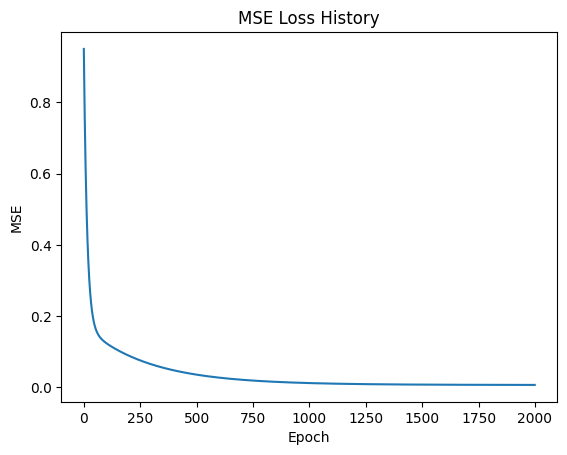

In [14]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title("MSE Loss History")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

Pada grafik tersebut, dapat dilihat bahwa *loss* menurun pada tiap *epoch*-nya.

## Tugas

Tugas Anda adalah membuat model klasifikasi menggunakan *multi-layer dense neural network* untuk menyelesaikan permasalahan klasifikasi pada dataset Iris. Spesifikasi model yang diinginkan adalah sebagai berikut.

*   Anda tidak diperkenankan menggunakan *layer built-in* PyTorch; semuanya harus menggunakan ***matrix multiplication*** untuk perhitungan *forward pass*.
*   Ukuran *hidden layer* (termasuk *input layer* dan *output layer*) adalah 4, 10, 20, 10, 3.
*   *Loss function* yang digunakan adalah Categorical Cross Entropy (CCE).
*   Gunakan *activation function* ReLU setelah tiap *layer* kecuali *layer* terakhir.
*   Ingat untuk menggunakan softmax setelah *layer* terakhir.
*   Implementasi *optimizer* menggunakan *mini-batch gradient descent*.
*   Implementasi Nesterov Accelerated Gradient (NAG) dengan koefisien momentum 0.9.

*Update* parameter pada Nesterov Accelerated Gradient (NAG) dapat dirumuskan:

$$v_t = \gamma v_{t-1}-\alpha \nabla_{\theta}J(\theta_{t-1} + \gamma v_{t-1})$$
$$\theta_{t}=\theta_{t-1} + v_{t}$$

Dengan penjelasan sebagai berikut.


*   $v_t$ adalah *velocity* pada iterasi ke-t.
*   $\gamma$ adalah koefisien momentum.
*   $\alpha$ adalah *learning rate*.
*   $J$ adalah *loss function*, dalam hal ini adalah CCE.
*   $\theta_{t}$ adalah parameter pada iterasi ke-t.

Inisialisasi $v$ dengan nilai $0$, dengan ukuran sama dengan $\theta$. Perhatikan bahwa matriks parameter $\theta$ di tiap *layer* harus di-*update*.



Jika Anda tertarik untuk mengetahui lebih lanjut terkait NAG, Anda dapat mengunjungi [URL](https://mitliagkas.github.io/ift6085-2019/ift-6085-lecture-6-notes.pdf) ini.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


Lengkapilah potongan kode berikut pada bagian yang ditandai dengan `# TODO`.

In [16]:
import matplotlib.pyplot as plt

class MLPClassifier:
  def __init__(self, hidden_size_list, eps=1e-9, epochs=2000, lr=1e-4, batch_size=None, momentum=0.9):
    # WARNING: DO NOT CHANGE; FOR REPRODUCIBILITY
    torch.manual_seed(15)
    # size of hidden layers, including input and output
    self.hidden_size_list = hidden_size_list
    # list of trainable parameters (for each layer)
    self.weights = []
    # small constant to prevent division by zero in computing CCE
    self.eps = eps
    # number of iterations
    self.epochs = epochs
    # learning rate
    self.lr = lr
    # if batch_size = None, then use batch gradient descent
    self.batch_size = batch_size
    # momentum coefficient
    self.momentum = momentum
    # list of NAG velocities (for each layer)
    self.velocities = []

    # Loss History
    self.loss_history = []

  def _init_weights(self):
    # modify first hidden layer to include bias
    hids = self.hidden_size_list
    hids[0] += 1
    for i in range(len(hids)-1):
      row_size = hids[i]
      col_size = hids[i+1]
      # initialize using Glorot initialization
      # read this for more info: https://pytorch.org/docs/stable/_modules/torch/nn/init.html#xavier_uniform_
      init = torch.nn.init.xavier_uniform_(torch.empty(row_size, col_size))
      self.weights.append(torch.nn.Parameter(init, requires_grad=True))
      self.velocities.append(torch.zeros_like(init))

  def fit(self, X_train, y_train):
    if X_train.shape[1] != self.hidden_size_list[0]:
      raise RuntimeError('The size of the first layer and the number of features mismatch.')
    if len(set(y_train)) != self.hidden_size_list[-1]:
      raise RuntimeError('The size of the last layer and the number of output classes mismatch.')
    if self.batch_size == None:
      # batch GD
      self.batch_size = X_train.shape[0]

    # weights initialization and tensor conversion
    self._init_weights()
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)

    # modify X_train to include bias using vector of ones
    ones = torch.ones(X_train.shape[0], 1)
    X_train = torch.cat((X_train, ones), dim=1)

    # convert to one hot encoding
    y_train = torch.nn.functional.one_hot(y_train, num_classes=self.hidden_size_list[-1])

    # training
    for i in range(self.epochs):
      # shuffle data (must be consistent between X and y)
      # for mini-batch or stochastic gradient descent
      # not affecting batch gradient descent
      indices = torch.randperm(X_train.shape[0])
      X_train = X_train[indices]
      y_train = y_train[indices]

      # TODO: Lakukan iterasi mini-batch gradient descent
      for j in range(0, X_train.shape[0], self.batch_size):
        X_batch = X_train[j : j + self.batch_size]
        y_batch = y_train[j : j + self.batch_size]
        pred_i = self._forward(X_batch)
        loss = self._cceloss(pred_i, y_batch)
        self.loss_history.append(loss)

        for weight in self.weights:
          if(weight.grad != None):
            weight.grad.zero_()

        loss.backward()

        with torch.no_grad():
          for weight, velocity in zip(self.weights, self.velocities):
            velocity.mul_(self.momentum).add_(self.lr * weight.grad)
            weight.sub_(velocity)

      # progress
      if i % 100 == 0:
        print(f'Iteration: {i}, Loss: {loss}')

  def _softmax(self, x):
    # TODO: Implementasi softmax
    maxes = torch.max(x, 1, keepdim = True)[0]
    x_exp = torch.exp(x - maxes)
    x_exp_sum = torch.sum(x_exp, 1, keepdim = True)
    return x_exp/x_exp_sum

  def _cceloss(self, y_pred, y_true):
    # TODO: Implementasi CCE loss
    m = y_pred.size()[0]
    return -(1 / m) * torch.sum(y_true * torch.log(y_pred + self.eps))

  def _forward(self, X):
    # TODO: Lakukan forward propagation
    out = X
    for i, weight in enumerate(self.weights[:-1]):
      out = self._relu(out @ weight)
    out = self._softmax(out @ self.weights[-1])
    return out

  def _relu(self, X):
    # TODO: Implementasi ReLU
    return torch.maximum(torch.zeros_like(X), X)

  def show_loss_history(self, label: str):
    loss_history = [loss.detach().numpy().item() for loss in self.loss_history]
    plt.plot(loss_history)
    plt.title(f"CCE Loss History for {label}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

  def predict(self, X_test):
    # TODO: Implementasi fungsi untuk prediksi dari suatu dataset
    # Output dari fungsi ini adalah class yang diprediksi, yakni 0, 1, atau 2
    # Anda dapat menggunakan fungsi torch.argmax()

    X_test = torch.tensor(X_test, dtype=torch.float32)
    ones = torch.ones(X_test.shape[0], 1)
    X_test = torch.cat((X_test, ones), dim=1)

    out = self._forward(X_test)
    return torch.argmax(out, dim=1)

Setelah melengkapi kode di atas, jalankan eksperimen sesuai dengan kondisi-kondisi yang diberikan berikut untuk membandingkan performa batch, mini-batch, dan stochastic gradient descent, dengan dan tanpa Nesterov's momentum.


*   Batch gradient descent tanpa momentum
*   Batch gradient descent dengan momentum ($\gamma=0.9$)
*   Mini-batch gradient descent (batch size = 12) tanpa momentum
*   Mini-batch gradient descent (batch size = 12) dengan momentum ($\gamma=0.9$)
*   Stochastic gradient descent tanpa momentum
*   Stochastic gradient descent dengan momentum ($\gamma=0.9$)

Semua konfigurasi eksperimen yang lain (*epochs*, *learning rate*, dll.) bebas ditentukan oleh Anda sendiri. Akan tetapi, pastikan bahwa semua eksperimen menggunakan konfigurasi yang sama. Sebagai contoh, jika Anda menentukan jumlah iterasi yang digunakan adalah 100, maka pastikan semua eksperimen tersebut menggunakan 100 iterasi.



In [17]:
# TODO: Eksperimen dengan menggunakan 6 kondisi di atas

hidden_size_list = [4, 10, 20, 10, 3]

print("Batch gradient descent tanpa momentum")
mlp_batch_no_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0, batch_size = None)
mlp_batch_no_momentum.fit(X_train, y_train)
# =======================================================================================================================================

print("\nBatch gradient descent dengan momentum \n")
mlp_batch_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0.9, batch_size = None)
mlp_batch_momentum.fit(X_train, y_train)
# =======================================================================================================================================

print("\nMini-batch gradient descent tanpa momentum \n")
mlp_mini_batch_no_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0, batch_size = 12)
mlp_mini_batch_no_momentum.fit(X_train, y_train)
# =======================================================================================================================================

print("\nMini-batch gradient descent dengan momentum \n")
mlp_mini_batch_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0.9, batch_size = 12)
mlp_mini_batch_momentum.fit(X_train, y_train)
# =======================================================================================================================================

print("\nStochastic gradient descent tanpa momentum \n")
mlp_stochastic_no_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0, batch_size = 1)
mlp_stochastic_no_momentum.fit(X_train, y_train)
# =======================================================================================================================================

print("\nStochastic gradient descent dengan momentum \n")
mlp_stochastic_momentum = MLPClassifier(hidden_size_list = [4, 10, 20, 10, 3], momentum = 0.9, batch_size = 1)
mlp_stochastic_momentum.fit(X_train, y_train)

Batch gradient descent tanpa momentum
Iteration: 0, Loss: 1.573599100112915
Iteration: 100, Loss: 1.2854770421981812
Iteration: 200, Loss: 1.1364359855651855
Iteration: 300, Loss: 1.0620884895324707
Iteration: 400, Loss: 1.0133241415023804
Iteration: 500, Loss: 0.9781032800674438
Iteration: 600, Loss: 0.9516507387161255
Iteration: 700, Loss: 0.9302563071250916
Iteration: 800, Loss: 0.9124450087547302
Iteration: 900, Loss: 0.8984267115592957
Iteration: 1000, Loss: 0.8873147368431091
Iteration: 1100, Loss: 0.8778548836708069
Iteration: 1200, Loss: 0.8695380091667175
Iteration: 1300, Loss: 0.8620705008506775
Iteration: 1400, Loss: 0.855515718460083
Iteration: 1500, Loss: 0.8495394587516785
Iteration: 1600, Loss: 0.843810498714447
Iteration: 1700, Loss: 0.8382071256637573
Iteration: 1800, Loss: 0.8326878547668457
Iteration: 1900, Loss: 0.8272482752799988

Batch gradient descent dengan momentum 

Iteration: 0, Loss: 1.573599100112915
Iteration: 100, Loss: 0.8922677636146545
Iteration: 200, 

Evaluasi hasil klasifikasi keenam eksperimen tersebut dengan metrik akurasi. Gunakan data *test* sesuai yang telah di-*split* sebelumnya (`X_test` dengan ground truth `y_test`). Berikan sedikit penjelasan terkait hasil klasifikasi tersebut, apakah sesuai ekspektasi Anda dengan mempertimbangkan *loss*-nya? Anda dapat menggunakan `accuracy_score` untuk menghitung skor akurasi.

In [18]:
# TODO: Evaluasi akurasi
from sklearn.metrics import accuracy_score

counter = 1
for model in [mlp_batch_no_momentum, mlp_batch_momentum, mlp_mini_batch_no_momentum, mlp_mini_batch_momentum, mlp_stochastic_no_momentum, mlp_stochastic_momentum]:
  y_pred = model.predict(X_test)

  print(f"Evaluasi {counter}", accuracy_score(y_test, y_pred))
  counter += 1

Evaluasi 1 0.6
Evaluasi 2 0.9666666666666667
Evaluasi 3 0.9666666666666667
Evaluasi 4 0.9333333333333333
Evaluasi 5 0.9333333333333333
Evaluasi 6 0.9666666666666667


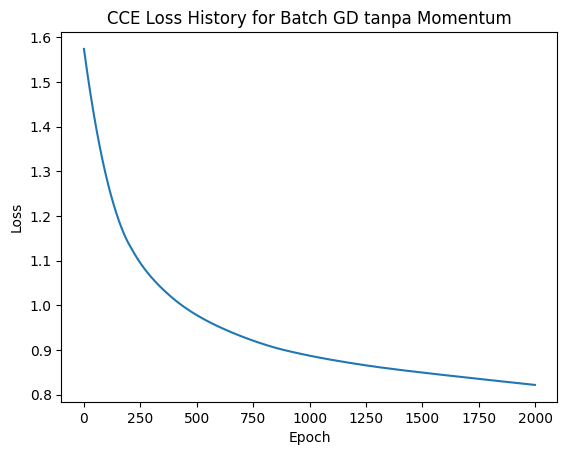

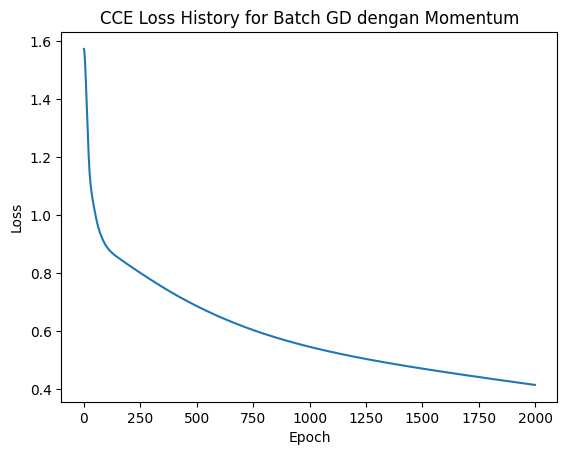

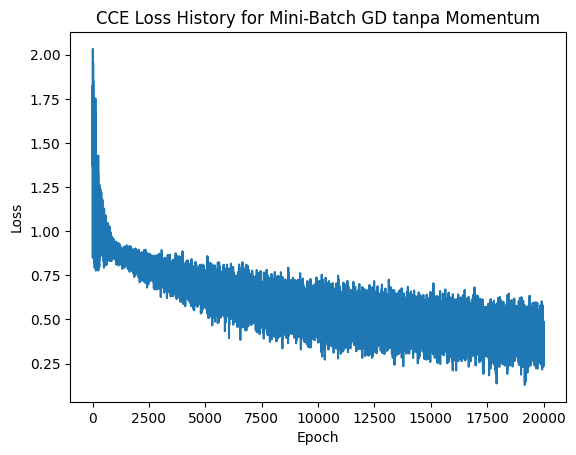

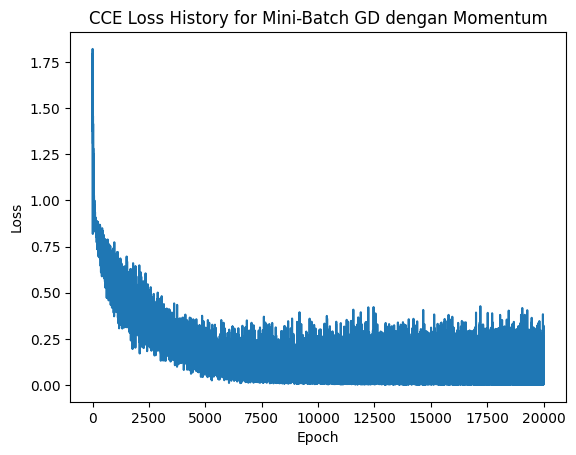

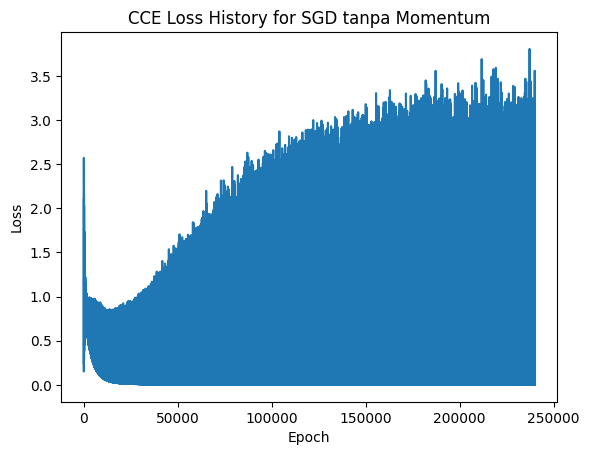

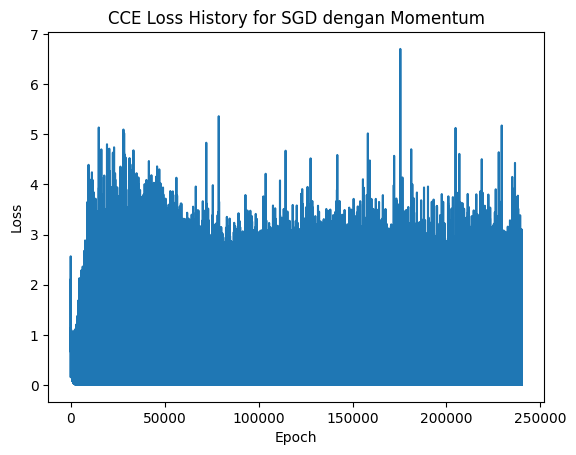

In [19]:
# Just to show representation

mlp_batch_no_momentum.show_loss_history("Batch GD tanpa Momentum")
mlp_batch_momentum.show_loss_history("Batch GD dengan Momentum")
mlp_mini_batch_no_momentum.show_loss_history("Mini-Batch GD tanpa Momentum")
mlp_mini_batch_momentum.show_loss_history("Mini-Batch GD dengan Momentum")
mlp_stochastic_no_momentum.show_loss_history("SGD tanpa Momentum")
mlp_stochastic_momentum.show_loss_history("SGD dengan Momentum")

**Jawaban untuk "Berikan sedikit penjelasan terkait hasil klasifikasi tersebut, apakah sesuai ekspektasi Anda dengan mempertimbangkan loss-nya?"**

Hasil klasifikasi yang didapatkan tidak sesuai dengan ekspektasi saya terutama pada evaluasi eksperimen ketiga dan keempat (MBGD tanpa momentum dengan MBGD dengan momentum). Walaupun model tersebut memang lebih cepat konvergen dengan menggunakan momentum, namun akurasi yang dihasilkan ketika model selesai dilatih tidak sebaik model yang menggunakan momentum pada model MBGD. Hal ini dikarenakan dengan menggunakan momentum, model bisa memperkuat fluktuasi yang dihasilkan oleh batch yang berbeda, terutama jika batch tersebut mengandung data yang "anomali" atau tidak merepresentasikan distribusi data global. Walaupun momentum mepercepat proses konvergensi, hal ini tidak menjamin akurasi dari prediksi menggunakan model tersebut. Hal ini juga dapat dikarenakan proses randomisasi batch yang berbeda juga dapat menghasilkan perilaku seperti ini.

Jelaskan apa yang bisa Anda dapatkan dari percobaan tersebut! Tentukan metode apa yang menurut Anda memiliki performa yang paling baik, jelaskan alasan Anda memilih metode tersebut, dan jelaskan mengapa metode tersebut memberikan performa yang paling baik.

1. Batch Gradient Descent (BGD)
- Tanpa Momentum:
> Kecepatan konvergensi lambat, terutama terlihat dari penurunan loss yang cukup gradual. Pada 2000 iterasi, loss akhir adalah 0.827 dan akurasi evaluasi sebesar 0.6.

- Dengan Momentum:
> Momentum mempercepat konvergensi secara signifikan. Pada 100 iterasi saja, loss sudah turun hingga 0.892, dan pada iterasi ke-2000 loss berada di 0.425. Akurasi evaluasi jauh lebih tinggi, yaitu 0.966.

2. Mini-Batch Gradient Descent (MBGD)
- Tanpa Momentum:
> MBGD tanpa momentum menunjukkan fluktuasi yang lebih tinggi dalam loss di beberapa titik, terutama pada iterasi 600, 800, dan 900. Namun, secara keseluruhan, model mampu mencapai akurasi yang cukup baik, yaitu 0.966 pada iterasi akhir.

- Dengan Momentum:
> Penggunaan momentum membuat proses konvergensi lebih stabil dan lebih cepat. Pada iterasi ke-400, loss sudah sangat rendah di angka 0.183, dan akurasi evaluasi pada akhirnya berada di 0.933, sedikit lebih rendah dibandingkan MBGD tanpa momentum.
3. Stochastic Gradient Descent (SGD)
- Tanpa Momentum:

> SGD tanpa momentum menunjukkan variasi yang sangat besar di awal, dengan loss turun sangat cepat hingga 0.033 di iterasi ke-200, namun berfluktuasi pada iterasi-iterasi selanjutnya. Pada akhirnya, SGD tanpa momentum memiliki akurasi evaluasi yang cukup baik di angka 0.933.
- Dengan Momentum:

> SGD dengan momentum mengurangi fluktuasi dan mempercepat penurunan loss secara signifikan. Pada iterasi ke-200, loss sudah sangat rendah (0.001). Akurasi evaluasi yang dicapai adalah 0.966, setara dengan BGD dan MBGD dengan momentum.

Menurut saya, performa metode yang memberikan performa terbaik dapat dilihat dari 2 sisi:

- Apabila kita melihat dari sisi kecepatan: saya mengobservasi bahwa mini batch gradient descent dengan momentum memberikan performa, penggunaan memory yang lebih kecil, dan juga kecepatan yang lebih baik dibandingkan model-model yang lain.

- Apabila kita melihat dari sisi konvergensi, saya akan memilih SGD dengan momentum, dari hasil yang saya peroleh, dapat dilihat bahwa SGD memberikan konvergensi yang lebih cepat dalam meminimalkan loss function yang ada.

Akan tetapi, secara keseluruhan, MBGD memberikan performa yang lebih baik karena waktu untuk mengevaluasi selama suatu threshold tertentu jauh lebih cepat dibandingkan SGD, sehingga dalam banyak kasus MBGD akan memberikan performa yang seharusnya lebih baik.

- Hal ini karena MBGD lebih stabil daripada SGD karena memperbarui setelah memproses batch kecil, memberikan gradien yang lebih representatif. Cara MBGD menghitung gradien adalah pada setiap step/langkah, MBGD menggunakan beberapa sampel (mini-batch) sampai seluruh data diperoleh.


Namun terakhir, pada kasus klasifikasi dimana waktu tidak dipentingkan (hanyalah berdasarkan threshold), maka SGD akan memberikan hasil yang lebih baik karena lebih akurat dan dapat melarikan diri dari local minima karena variasi gradien.